# Evaluation of the results

In [259]:
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings
import networkx as nx

warnings.filterwarnings("error")
np.set_printoptions(linewidth=120, precision=2)

MODE = "a"

## Rearrange adjacency matrix based on node dependencies

From Crochiere & Oppenheim (1975):
> The procedure begins by searching the network for all nodes which do not have coefficient branches entering them. These nodes are then separated from the network and assigned to node set { n l }, as depicted in Fig. 2(a). It is apparent that these node values can be computed without knowledge of any of the node values in the network for time index n. Their evaluation may require only past node values for time n - 1 due to coefficient-delay branches, or present source input values at time n.

In [260]:

# matrix = [
# [0,	2, 0, 0, 0, 1],
# [1,	0, 2, 0, 0, 1],
# [1,	0, 0, 2, 0, 1],
# [1,	0, 0, 0, 2, 1],
# [1,	0, 0, 0, 0, 1],
# [0,	0, 0, 0, 0, 0],
# ],[
# [0, 1, 0, 0, 0, 1],
# [1, 0, 1, 0, 0, 1],
# [1, 0, 0, 1, 0, 1],
# [1, 0, 0, 0, 1, 1],
# [1, 0, 0, 0, 0, 1],
# [0, 0, 0, 0, 0, 0]]
# matrix = np.array(matrix)
# N = 6

# iterate over all .json files in the directory and get the value called "fitness" from each file

import os
import re
fitness = 0
best = ""
for filename in os.listdir("../build/output"):
    if re.match(r".*Gen-\d+\.json$", filename):
        with open("../build/output/" + filename) as f:
            try:
                data = json.load(f)
            except json.JSONDecodeError:
                # skip files that are not valid JSON
                continue
            if data["fitness"] > fitness:
                fitness = data["fitness"]
                best = filename
            
if best == "":
    print("No files found")
    exit(1)

print("Best fitness:", fitness)
print("Best file:", best)

# build matrix from json file instead
with open("../build/output/" + best) as f:
    data = json.load(f)
    type_layer = data["type_layer"]
    value_layer = data["value_layer"]
    N = data["N"]
    readOutput = data["output"]
    fitnessJson = data["fitness"]
    # inputNodeIndex = data["inputNode"]
    # outputNodeIndex = data["outputNode"]
    
matrix = np.zeros((2, N, N))
for i in range(N):
    for j in range(N):
        matrix[0][i][j] = type_layer[i*N+j]
        matrix[1][i][j] = value_layer[i*N+j]

print("First layer of the matrix:")
print(matrix[0], end="\n\n")
print("Second layer of the matrix:")
print(matrix[1])


Best fitness: 0.7787050718934182
Best file: prueba._Gen-1927.json
First layer of the matrix:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 2. 0. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 0. 0. 2. 0. 2. 1. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 2.

In [261]:
fc = matrix[1] * (matrix[0] == 1)

def getMatrixesN(fc):
    n = []
    nodeIdxs = range(fc.shape[0])

    while True:
        n.append([j for j in nodeIdxs if not np.any(fc[:, j])])
        if n[-1] == []:
            n.pop()
            break
        nodeIdxs = [j for j in nodeIdxs if j not in n[-1]]
        fc[n[-1], :] = 0
    return n

orderedDependencies = getMatrixesN(fc)
print("Ordered dependencies:")
for i, dep in enumerate(orderedDependencies):
    print(f"n{i+1}: {dep}")


Ordered dependencies:
n1: [0, 2, 3, 4, 5, 6, 10, 15]
n2: [1]
n3: [7]
n4: [8, 11]
n5: [9, 12, 14, 16]
n6: [13, 18, 19]
n7: [17]


This transforms the list of nodes $\{n_1, n_2, \ldots, n_f\}$ into an ordered list of nodes which, if we compute in order, it's ensured to be computable. It also gives them a new ID. This will be used to obtain the *Precedence Form*.

In [262]:
import itertools
pairs = {}
newNodeNames = range(N)
orderedDependencies_singleList = list(itertools.chain(*orderedDependencies))
print("Ordered dependencies:")
print(orderedDependencies_singleList)
for i in range(N):
    pairs[newNodeNames[i]] = orderedDependencies_singleList[i]
print("Pairs:")
print(json.dumps(pairs, indent=4))

Ordered dependencies:
[0, 2, 3, 4, 5, 6, 10, 15, 1, 7, 8, 11, 9, 12, 14, 16, 13, 18, 19, 17]
Pairs:
{
    "0": 0,
    "1": 2,
    "2": 3,
    "3": 4,
    "4": 5,
    "5": 6,
    "6": 10,
    "7": 15,
    "8": 1,
    "9": 7,
    "10": 8,
    "11": 11,
    "12": 9,
    "13": 12,
    "14": 14,
    "15": 16,
    "16": 13,
    "17": 18,
    "18": 19,
    "19": 17
}


Interchange the nodes using the old matrix's connections and the newNodeNames.

In [263]:
newMatrix = np.zeros_like(matrix)

# for _ in pairs:
for i in range(N):
    for j in range(N):
        newMatrix[0][i][j] = matrix[0][pairs[i]][pairs[j]]
        newMatrix[1][i][j] = matrix[1][pairs[i]][pairs[j]]


In [264]:

def isComputable(reorderedMatrix):
    return not np.any(np.float128(np.triu(newMatrix[0].T == 1)))

print("Is the matrix computable?", isComputable(newMatrix))

print(newMatrix[0], end="\n\n")

newMatrix = matrix

Is the matrix computable? True
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0

Now compute the transfer function on each node using Transfer Matrix method (Jeng, Shyr-Long & Roy, Rohit & Chieng, Wei-hua. (2020). A Matrix Approach for Analyzing Signal Flow Graph. Journal of Information Science. 11. 1-17. 10.3390/info11120562)

In [265]:
# def computeCofactorMatrix(matrix):

#     def minor(A, i, j):
#         return np.linalg.det(np.delete(np.delete(A, i, axis=0), j, axis=1))
    
#     A_T_gain_values = (matrix[0] == 1) * matrix[1]
#     A_a = np.eye(N) - A_T_gain_values
#     # print("A_a:")
#     # print(A_a)
#     cofactorMatrix = np.zeros(A_a.shape)
#     for i in range(A_a.shape[0]):
#         for j in range(A_a.shape[1]):
#             cofactorMatrix[j, i] = (-1)**(i+j) * minor(A_a, i, j)
#     return cofactorMatrix

# input = np.zeros(L, dtype=np.float128)
# input[0] = 1
# state = np.zeros((L, N), dtype=np.float128)

# # print("New matrix:")
# # print(newMatrix[0])
# # print(newMatrix[1])

# # newMatrix[0] = newMatrix[0].T
# # newMatrix[1] = newMatrix[1].T
# # cofactorMatrix = computeCofactorMatrix(newMatrix)
# # for n in range(L):
# #     state[n][0] += input[n] # Input signal
# #     state[n] = cofactorMatrix  @ state[n]
    
# #     for i in range(N):
# #         for j in range(N):
# #             if (newMatrix[0].T)[i][j] == 2:
# #                 delay = int((newMatrix[1].T)[i][j])
# #                 if n + delay < L:
# #                     state[n + delay][j] += state[n][i]
# # output = state[:, N-1]


# # Compute without cofactor matrix
# for n in range(L):
#     state[n][0] += input[n] # Input signal
#     for i in range(N):
#         for j in range(N):
#             if newMatrix[0][i][j] == 1:
#                 state[n][j] += newMatrix[1][i][j] * state[n][i]
#             elif newMatrix[0][i][j] == 2:
#                 delay = int(newMatrix[1][i][j])
#                 if n + delay < L:
#                     state[n + delay][j] += state[n][i]
# output = state[:, N-1]


In [266]:
import soundfile as sf
import csv
    
target_json_files = [os.path.join('../build/output', f) for f in os.listdir('../build/output') if re.match(r'.*TARGET\.json$', f)]
if not target_json_files:
    print("No TARGET.json file found in ../build/output")
    exit(1)
    
with open(target_json_files[0], 'r') as f_json:
    data_json = json.load(f_json)

# print the target output
expected = data_json["Target"]
print("Expected output:")
print(expected)

# Now the b and a coefficients
b = data_json["b"]
a = data_json["a"]
print("b coefficients:", b)
print("a coefficients:", a)


# b = np.fromstring(b, dtype=np.float64, sep=' ')
# a = np.fromstring(a, dtype=np.float64, sep=' ')

# expected = signal.lfilter(b, a, input)

L = len(expected)
n = np.arange(0, L, 1)

# MSE_python = np.mean((output - expected)**2)
# fitness_python = 1 / (1 + MSE_python)
# print("Fitness Expected/Python:", fitness_python)

# Ensure both arrays are float64 and same length
readOutput_arr = np.asarray(readOutput, dtype=np.float64)
expected_arr = np.asarray(expected, dtype=np.float64)
min_len = min(len(readOutput_arr), len(expected_arr))
readOutput_arr = readOutput_arr[:min_len]
expected_arr = expected_arr[:min_len]

# Check for NaN or Inf and replace with 0
readOutput_arr = np.nan_to_num(readOutput_arr, nan=0.0, posinf=0.0, neginf=0.0)
expected_arr = np.nan_to_num(expected_arr, nan=0.0, posinf=0.0, neginf=0.0)

MSE_json = np.mean((readOutput_arr - expected_arr)**2)
computedFitnessFromJsonOutput = 1 / (1 + MSE_json)
# print("Fitness Expected/JSON:  ", computedFitnessFromJsonOutput)

# print("Computed fitness:       ", fitnessJson)

np.set_printoptions(linewidth=120, precision=3, suppress=True)

# print("Expected output (python):")
# print(expected)
# print("Expected output (algorithm):")

# with open("../build/output/prueba-TARGET.csv", newline='') as f:
#     reader = csv.reader(f, delimiter=';')
#     row = next(reader)
#     row = next(reader)

# print(newData)
# newData = np.fromstring(newData, sep=', ')
# print(newData)
# print("JSON's output:")
# print(np.array(readOutput))
# print("Python's output:")
# print(output)

Expected output:
[0.6185533409694647, -0.2823571783023975, 0.3637917354929803, 0.40442577010317216, 0.10970854254462026, -0.1086326829368538, -0.10867378977173558, -0.021271385526574704, 0.004765045241957644, -0.0253186081328034, -0.018614546498559648, 0.04587361334826405, 0.08499148220259628, 0.031220449761104524, -0.06756709776256076, -0.10064405111318701, -0.02909045085020629, 0.06784720273998933, 0.08773372502573867, 0.02027996030057455, -0.05245509618976696, -0.058357259681366666, -0.010058392807402158, 0.027999460743331442, 0.023093144457479585, 0.0015203995460810263, -0.001276225149525417, 0.009613168499951436, 0.004009349023261867, -0.0219531744047331, -0.03416153213040413, -0.006497813900429247, 0.037836672615824865, 0.04796293183057324, 0.006668929538268658, -0.04473842397238783, -0.051045695894827915, -0.0055151872661955495, 0.04303223650866453, 0.04530573871341684, 0.0039403300264392455, -0.03455381783712991, -0.0336420720446857, -0.002566218579593058, 0.021913335622202004,

Best fitness: 0.7787050718934182
Best file: prueba._Gen-1927.json


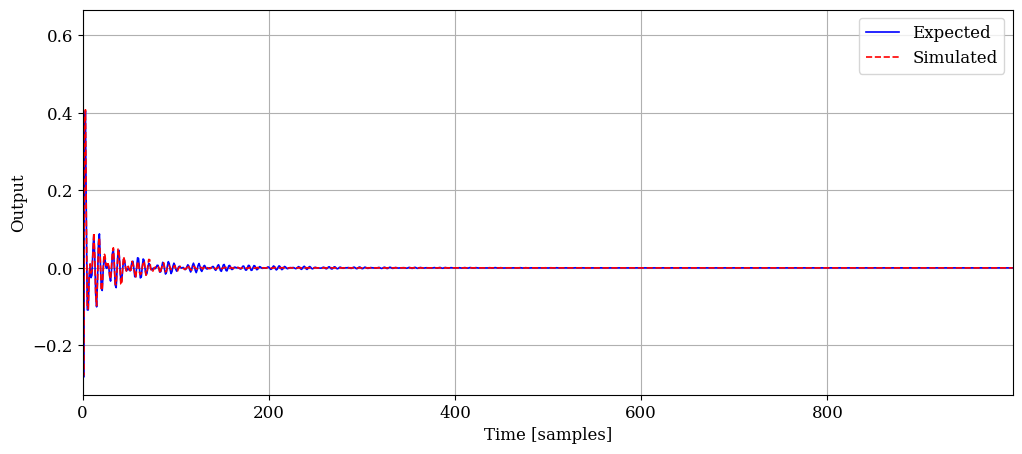

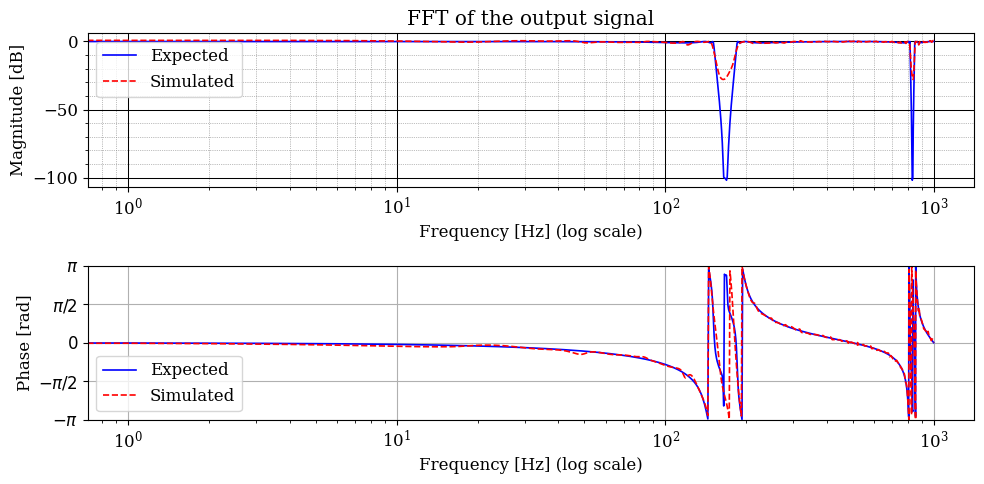

In [267]:
print("Best fitness:", fitness)
print("Best file:", best)

plt.figure(figsize=(12, 5))
plt.rc('font', family='serif')
# plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi'] = 100

plt.plot(n, expected, '-', color='blue', linewidth=1.2)
plt.plot(n, readOutput, '--', color='red', linewidth=1.2)
plt.legend([
    "Expected",
    "Simulated",
    ])
plt.grid('both')
plt.xlabel("Time [samples]")
# plt.xlim([0, 2000])
plt.xlim([0, L-1])
plt.ylabel("Output")
plt.show()

from scipy import fft

yf_expected = fft.fft(expected, L)
# yf_expected = yf_expected[:int(L/2+1)]
yf_readOutput = fft.fft(readOutput, L)
# yf_readOutput = yf_readOutput[:int(L/2+1)]

plt.figure(figsize=(10, 5))
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi'] = 100

plt.subplot(2, 1, 1)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(which='major', linestyle='-', linewidth='0.75', color='black')
# freqs = np.fft.rfftfreq(L, d=1/48000)  # d=1 assumes normalized sampling rate
plt.semilogx(20*np.log10(np.abs(yf_expected)), '-', color='blue', linewidth=1.2)
plt.semilogx(20*np.log10(np.abs(yf_readOutput)), '--', color='red', linewidth=1.2)
plt.xlabel("Frequency [Hz] (log scale)")
# freqsTicks = np.array([63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000, 20000])
# plt.xticks(freqsTicks, [str(f) for f in freqsTicks], rotation=90, fontsize=10)
# plt.xlim([4000, 7000])
# plt.ylim([-10, 0])
plt.ylabel("Magnitude [dB]")
plt.title("FFT of the output signal")
plt.legend(["Expected", "Simulated", "JSON"])

plt.subplot(2, 1, 2)
plt.semilogx(np.angle(yf_expected), '-', color='blue', linewidth=1.2)
plt.semilogx(np.angle(yf_readOutput), '--', color='red', linewidth=1.2)
plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), 
           [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
plt.ylabel("Phase [rad]")
plt.ylim([-np.pi, np.pi])
plt.grid()
plt.xlabel("Frequency [Hz] (log scale)")
# plt.xlim([freqs[1] if len(freqs) > 1 else 1, freqs[-1]])

plt.legend(["Expected", "Simulated", "JSON"], loc="lower left")
plt.tight_layout()
plt.show()




In [268]:

# import sounddevice as sd
# import soundfile as sf

# sd.play(expected, samplerate)
# sd.wait()

# sd.play(readOutput, samplerate)
# sd.wait()


The cofactor $\alpha_j$ equals $(-1)^j \det (\mathbf{M}_{1,j+1}(\mathbf{A}))$, where $(-1)^j \mathbf{M}_{1,j+1}(\mathbf{A}))$ is the cofactor matrix, a signed version of a minor $M_{1,j+1}(\mathbf{A})$ defined by deleting the first row and the $j$+1th column from the matrix $\mathbf{A}$. 

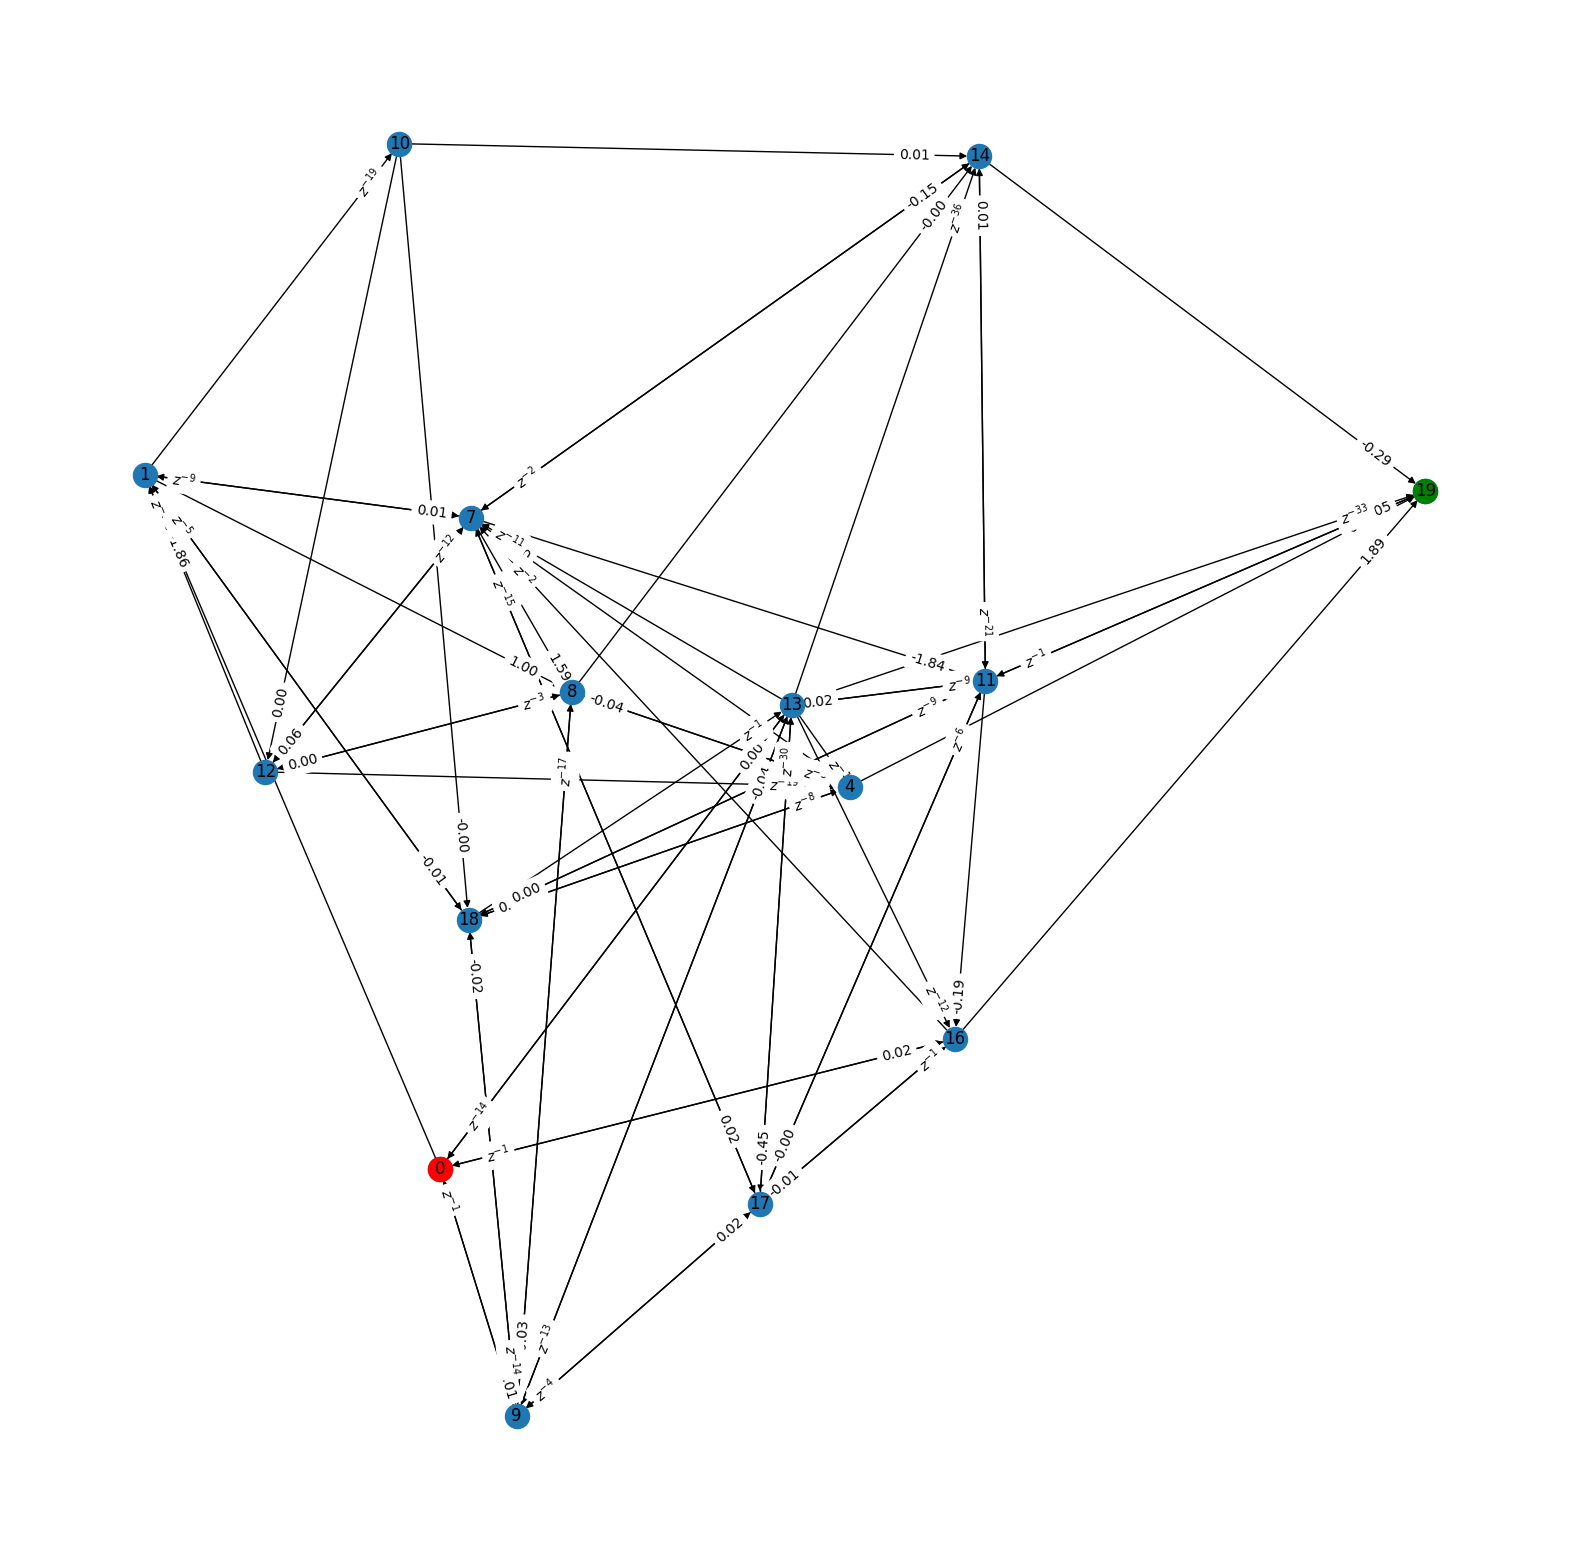

In [269]:
G = nx.DiGraph()
nodesToShow = [i for i in range(N) if np.any(matrix[0][i] == 1) or np.any(matrix[0][:, i] == 1)]
G.add_nodes_from(nodesToShow)

fig = plt.figure(1, figsize=(20, 20)) 
plt.axis('off')
# plt.title("Matrix")

# print(matrix[0])
# print(matrix[1])
edge_labels = {}
edges = []
for i in range(N):
    for j in range(N):
        if matrix[0][i][j] == 1:
            G.add_edge(i, j)
            edges.append((i, j))
            edge_labels[(i, j)] = f"{matrix[1][i][j]:.2f}" 
        elif matrix[0][i][j] == 2:
            G.add_edge(i, j)
            edges.append((i, j))
            edge_labels[(i, j)] = r"$z^{-" + str(int(matrix[1][i][j])) + "}$"
        

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edges)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.9)

# modify aspect of nodes 0 and biggest index, as input and output. Consider that it can be the same node

# if node has no inputs and no outputs, do not draw it
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=[N-1], node_color='g')

